# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive') # default
path_data = '/content/drive/My Drive/My DriveColab Notebooks/Coding TA/'


Mounted at /content/drive


In [3]:
url = 'https://drive.google.com/file/d/1YKbwwh_mCPccrwW3P4diRSRIfUhT5Et8/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep = ";", index_col='Patient File No.')

In [4]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,Ibeta-HCG(mIU/mL),IIbeta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Patient File No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,28,446,152,193,15,78,22,1048,2,5,7.0,0,0,199,199,795,368,216,36,30,83,68,207.0,4516,171,57,92,0,0,0,0,0,1.0,0,110,80,3,3,18,18,85
2,0,36,65,1615,249,15,74,20,117,2,5,11.0,1,0,608,199,673,109,617,38,32,84,316,153.0,2009,613,97,92,0,0,0,0,0,0.0,0,120,70,3,5,15,14,37
3,1,33,688,165,253,11,72,18,118,2,5,10.0,1,0,49408,49408,554,88,63,40,36,9,254,663.0,1052,497,36,84,0,0,0,1,1,1.0,0,120,80,13,15,18,20,10
4,0,37,65,148,297,13,72,20,12,2,5,4.0,0,0,199,199,806,236,342,42,36,86,1641,122.0,369,334,36,76,0,0,0,0,0,0.0,0,120,70,2,2,15,14,75
5,0,25,52,161,201,11,72,18,10,2,5,1.0,1,0,80145,80145,398,9,442,37,30,81,357,226.0,3009,438,38,84,0,0,0,1,0,0.0,0,120,80,3,4,16,14,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    int64  
 3   Height(Cm)             541 non-null    int64  
 4   BMI                    541 non-null    int64  
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    int64  
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14  Ibeta-HCG(mIU/mL)      541 non-null    int64  
 15  IIbeta-HCG(

# Preprocessing

## Missing value

In [6]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of abortions         0
Ibeta-HCG(mIU/mL)        0
IIbeta-HCG(mIU/mL)       0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               1
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)   

terdapat 3 missing valeue:

1. Marraige Status (Yrs)
2. AMH(ng/mL)
3. Fast food (Y/N)

In [7]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
PCOS (Y/N)               0.000000
Age (yrs)                0.000000
Weight (Kg)              0.000000
Height(Cm)               0.000000
BMI                      0.000000
Blood Group              0.000000
Pulse rate(bpm)          0.000000
RR (breaths/min)         0.000000
Hb(g/dl)                 0.000000
Cycle(R/I)               0.000000
Cycle length(days)       0.000000
Marraige Status (Yrs)    0.184843
Pregnant(Y/N)            0.000000
No. of abortions         0.000000
Ibeta-HCG(mIU/mL)        0.000000
IIbeta-HCG(mIU/mL)       0.000000
FSH(mIU/mL)              0.000000
LH(mIU/mL)               0.000000
FSH/LH                   0.000000
Hip(inch)                0.000000
Waist(inch)              0.000000
Waist:Hip Ratio          0.000000
TSH (mIU/L)              0.000000
AMH(ng/mL)               0.184843
PRL(ng/mL)               0.000000
Vit D3 (ng/mL)           0.000000
PRG(ng/mL)               0.000000
RBS(mg/dl)               0.000000
Weight gain

In [8]:
df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,Ibeta-HCG(mIU/mL),IIbeta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,5.410000e+02,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,135.325323,7941.399261,214.312384,13.802218,73.247689,19.243993,89.604436,2.560074,4.94085,9.392593,0.380776,0.288355,4.210196e+04,1.638165e+04,491.262477,253.963031,571.428835,37.992606,33.841035,82.641405,261.916821,162.040741,2205.369686,2135.057301,38.022181,101.219963,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,18.574861,17.565619,59.434381
std,0.469615,5.411006,198.712079,34286.906423,82.618357,1.840812,4.430285,1.688629,87.589249,0.901950,1.49202,9.089615,0.486027,0.692575,2.404759e+05,1.182106e+05,665.753846,299.787509,5906.762065,3.967920,3.596894,22.423303,348.579805,223.924132,1595.251988,26131.725878,50.188713,36.533922,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,20.953044,15.138308,112.302839
min,0.000000,20.000000,31.000000,137.000000,16.000000,11.000000,13.000000,16.000000,9.000000,2.000000,0.00000,0.000000,0.000000,0.000000,2.000000e+00,2.000000e+00,1.000000,1.000000,0.000000,26.000000,24.000000,8.000000,1.000000,1.000000,4.000000,0.000000,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,53.000000,152.000000,203.000000,13.000000,72.000000,18.000000,12.000000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000e+02,1.990000e+02,249.000000,59.000000,116.000000,36.000000,32.000000,84.000000,109.000000,26.000000,1249.000000,193.000000,25.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,14.000000,9.000000
50%,0.000000,31.000000,60.000000,157.000000,233.000000,14.000000,72.000000,18.000000,107.000000,2.000000,5.00000,7.000000,0.000000,0.000000,9.620000e+02,1.990000e+02,438.000000,199.000000,195.000000,38.000000,34.000000,89.000000,193.000000,73.500000,2035.000000,263.000000,26.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,44.000000
75%,1.000000,35.000000,70.000000,161.000000,263.000000,15.000000,74.000000,20.000000,115.000000,4.000000,5.00000,12.000000,1.000000,0.000000,2.185900e+04,4.176000e+03,611.000000,342.000000,351.000000,40.000000,36.000000,93.000000,306.000000,214.000000,2893.000000,379.000000,41.000000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,85.000000
max,1.000000,48.000000,914.000000,170688.000000,389.000000,18.000000,82.000000,28.000000,1201.000000,5.000000,12.00000,85.000000,1.000000,5.000000,3.246097e+06,2.108421e+06,10206.000000,4364.000000,137283.000000,48.000000,47.000000,98.000000,3861.000000,2333.000000,12824.000000,601466.000000,639.000000,832.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.0000

In [9]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                       Total   Percent
PCOS (Y/N)                 0  0.000000
Age (yrs)                  0  0.000000
Weight (Kg)                0  0.000000
Height(Cm)                 0  0.000000
BMI                        0  0.000000
Blood Group                0  0.000000
Pulse rate(bpm)            0  0.000000
RR (breaths/min)           0  0.000000
Hb(g/dl)                   0  0.000000
Cycle(R/I)                 0  0.000000
Cycle length(days)         0  0.000000
Marraige Status (Yrs)      1  0.184843
Pregnant(Y/N)              0  0.000000
No. of abortions           0  0.000000
Ibeta-HCG(mIU/mL)          0  0.000000
IIbeta-HCG(mIU/mL)         0  0.000000
FSH(mIU/mL)                0  0.000000
LH(mIU/mL)                 0  0.000000
FSH/LH                     0  0.000000
Hip(inch)                  0  0.000000
Waist(inch)                0  0.000000
Waist:Hip Ratio            0  0.000000
TSH (mIU/L)                0  0.000000
AMH(ng/mL)                 1  0.184843
PRL(ng/mL)               

## Handling Missing values

In [10]:
# # Cek missing values
# print("Missing values sebelum pembersihan:")
# print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())


Missing values setelah pembersihan:
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of abortions         0
Ibeta-HCG(mIU/mL)        0
IIbeta-HCG(mIU/mL)       0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg

<ipython-input-10-6b9632bf7689>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [11]:
# Distribusi target variable
df['PCOS (Y/N)'].value_counts(normalize=True)

,proportion
PCOS (Y/N),
0,0.672828
1,0.327172


## Histogram untuk variabel numerik

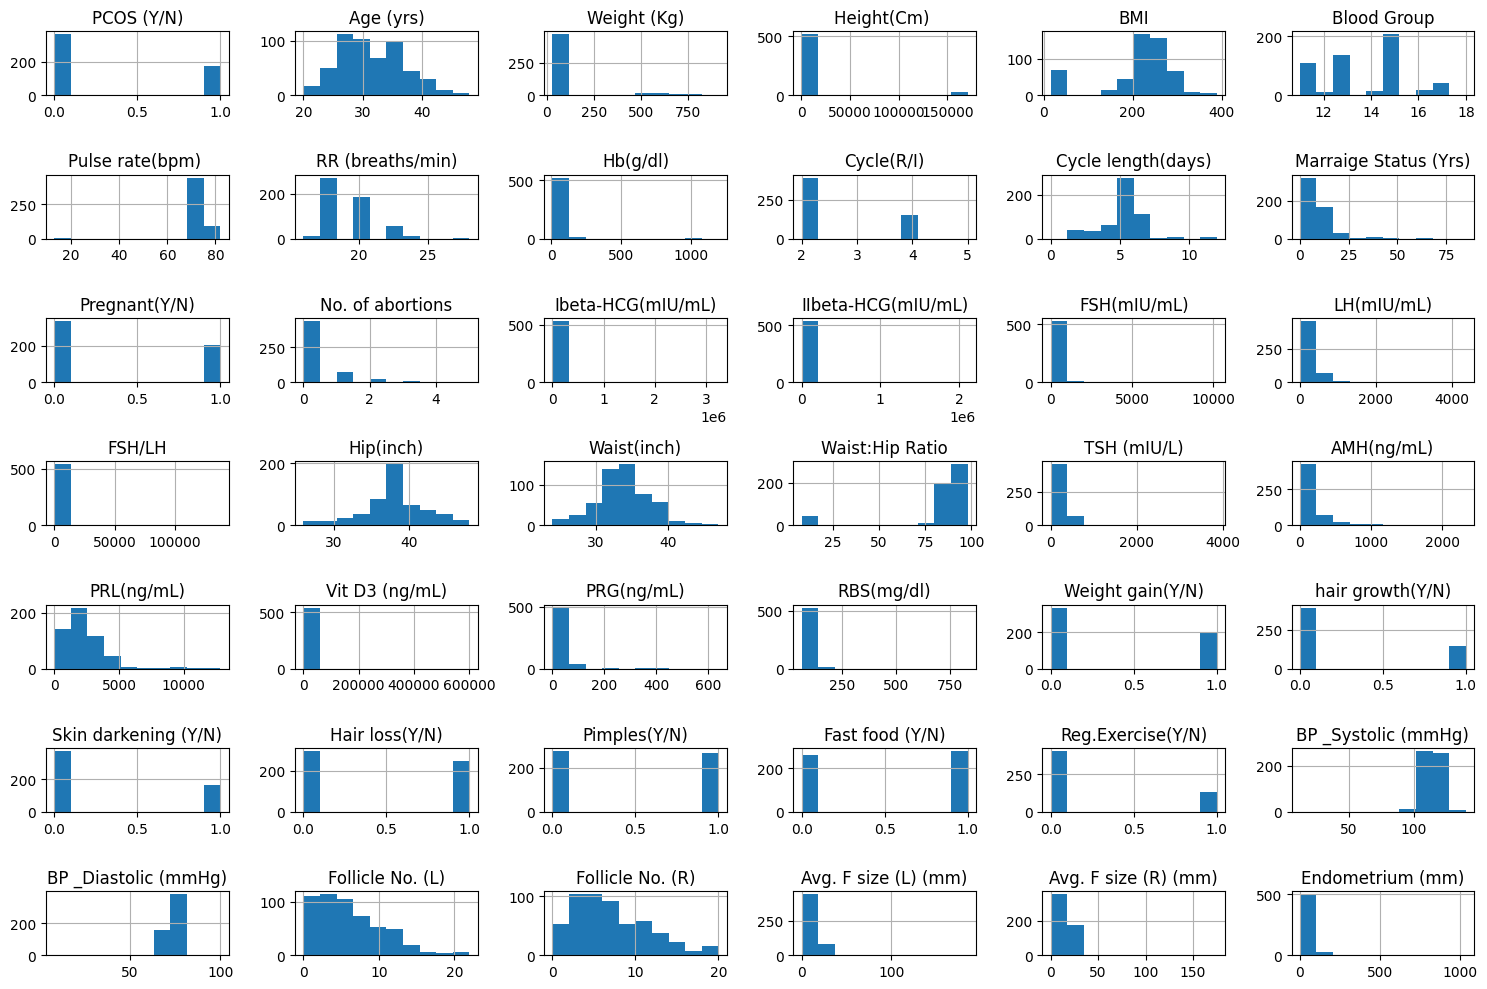

In [12]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Korelasi matrix

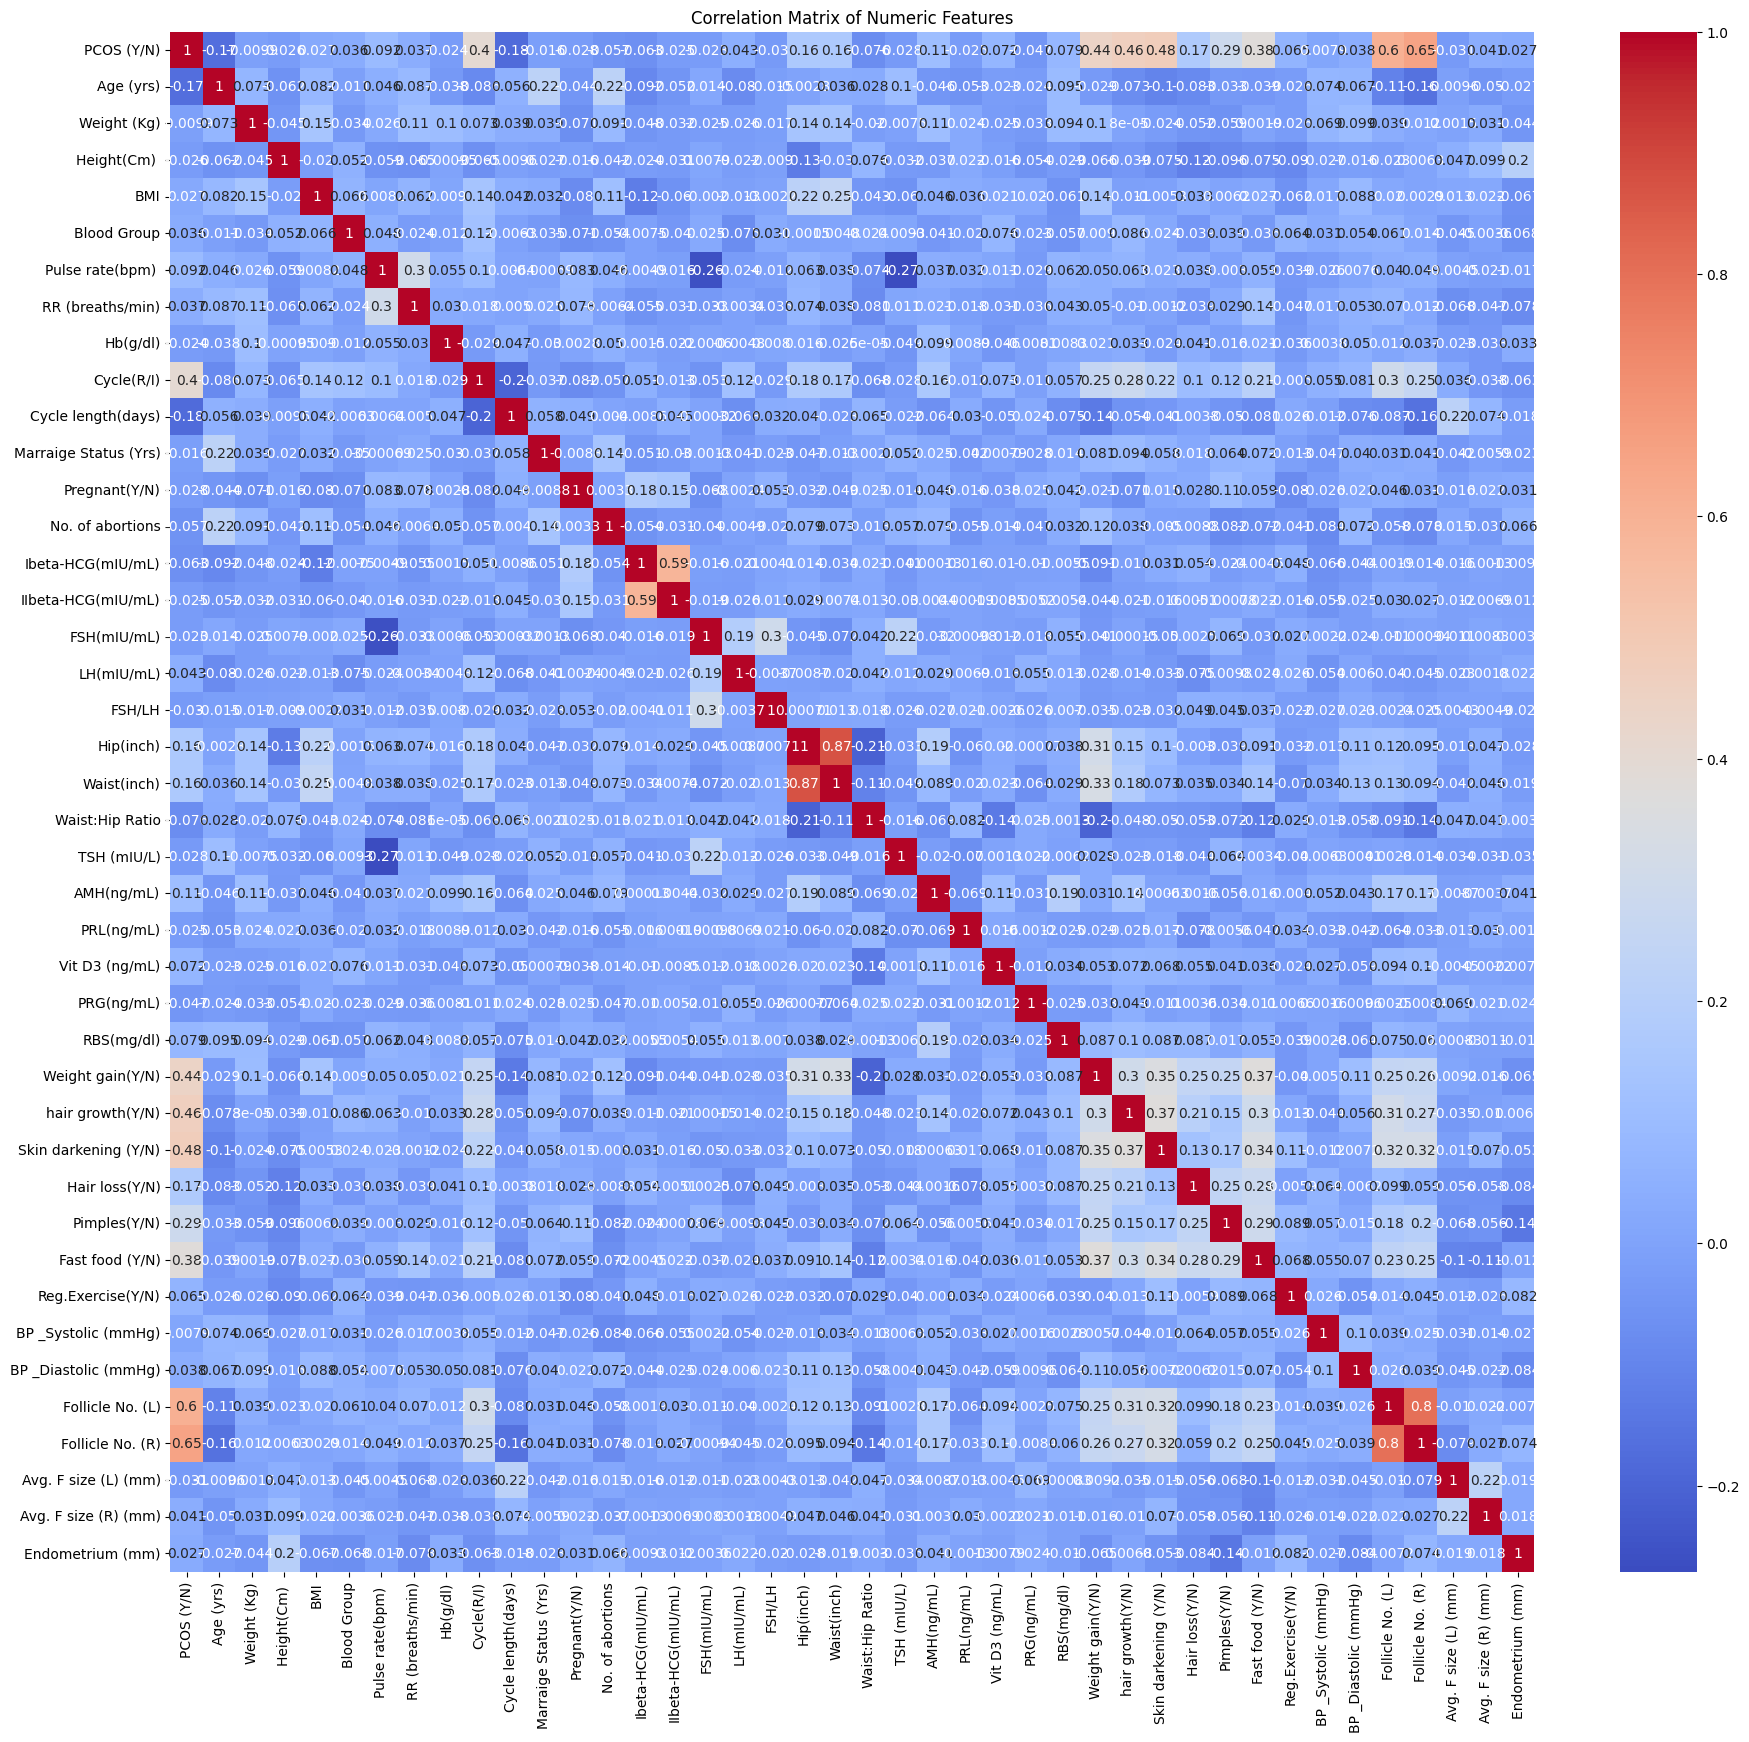

In [13]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Boxplot

untuk memvisualisasikan distribusi data dan potensi hubungan antara setiap fitur numerik dengan variabel target 'PCOS (Y/N)'

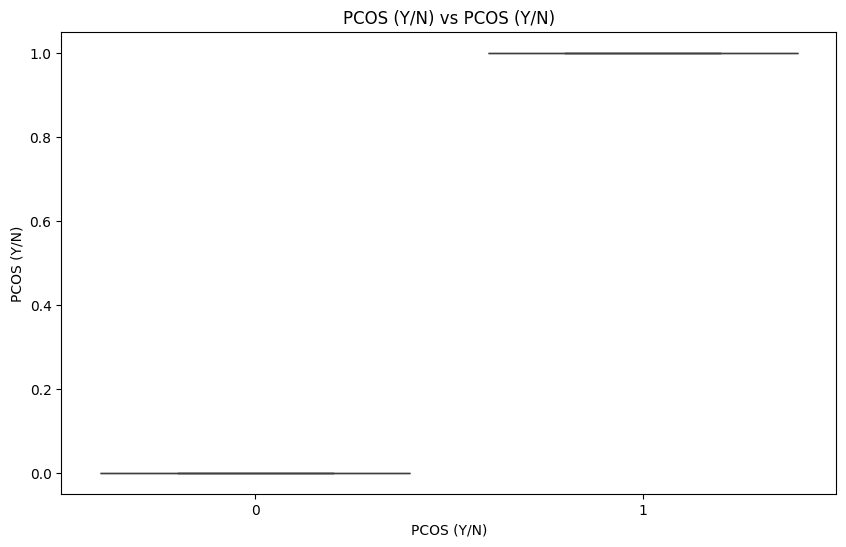

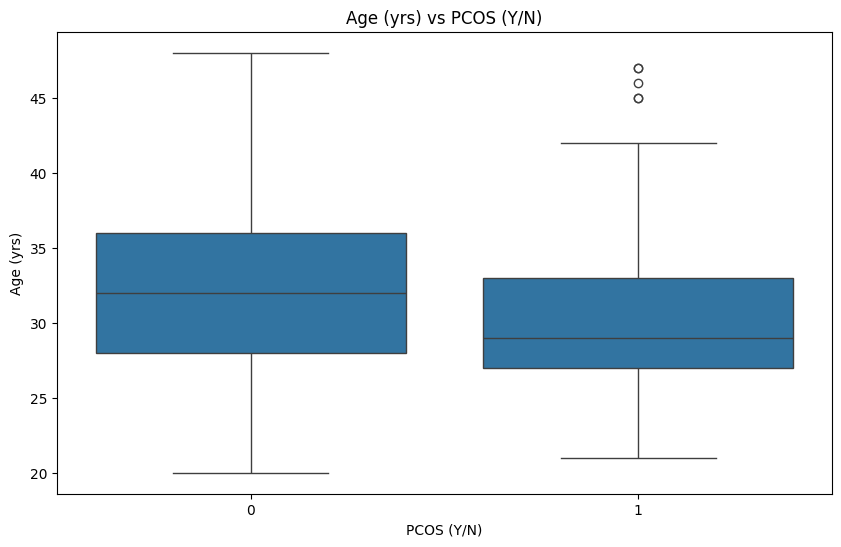

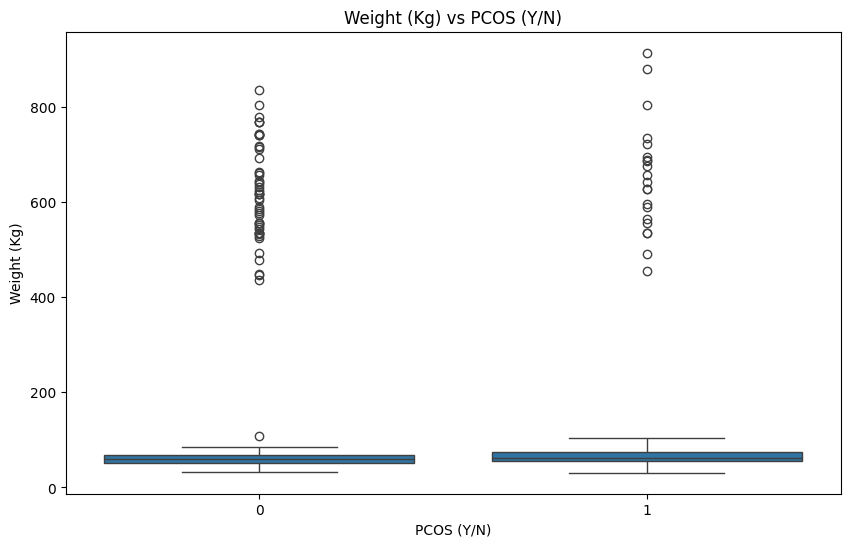

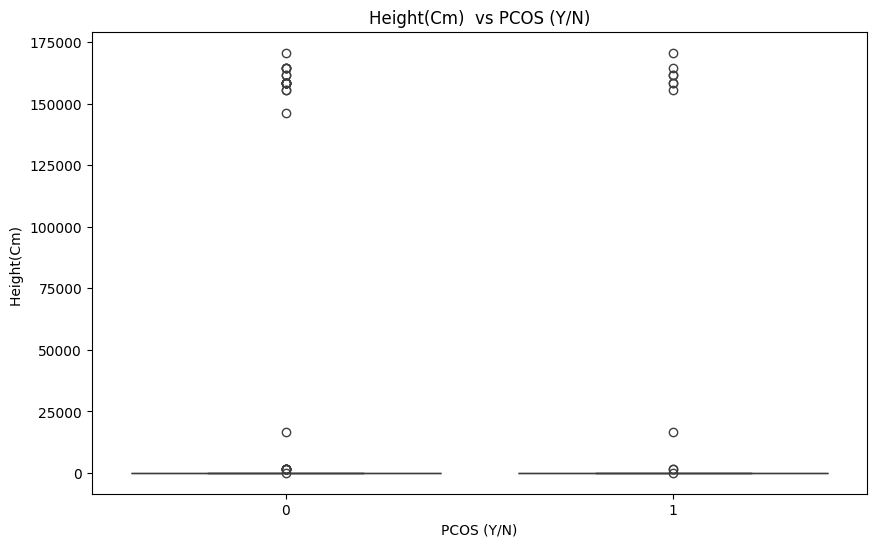

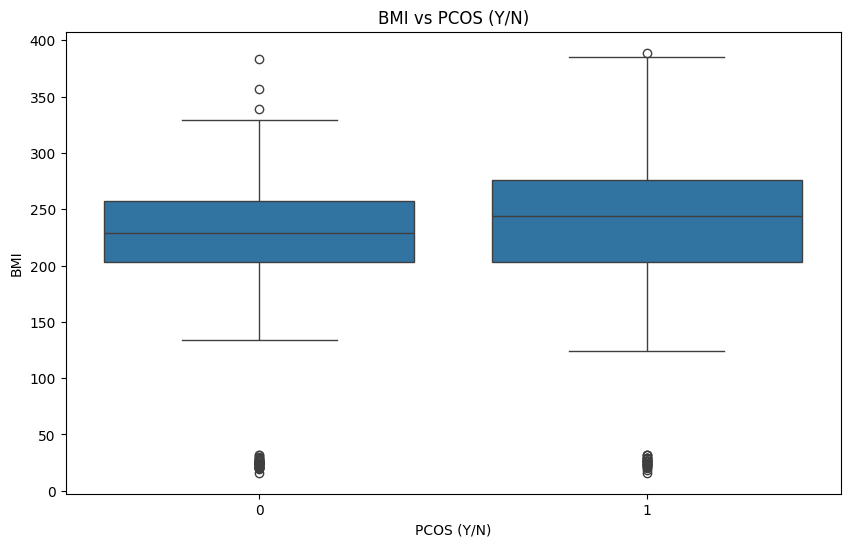

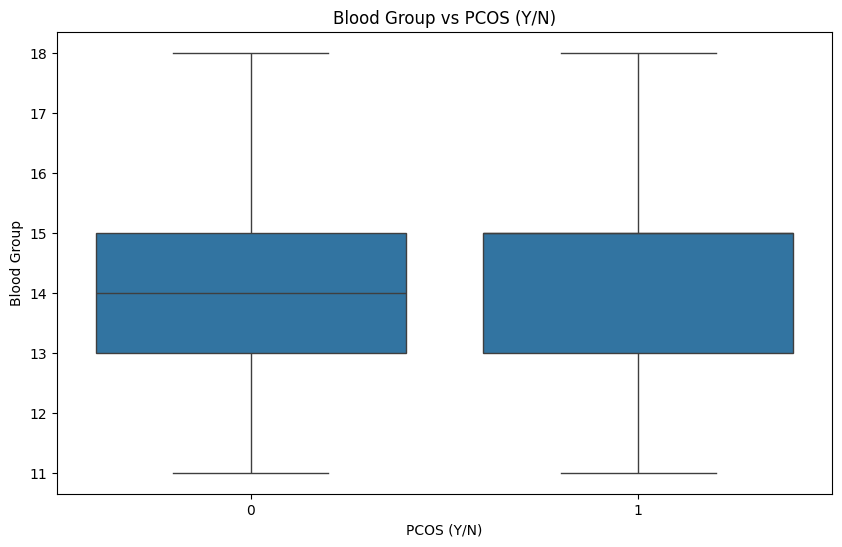

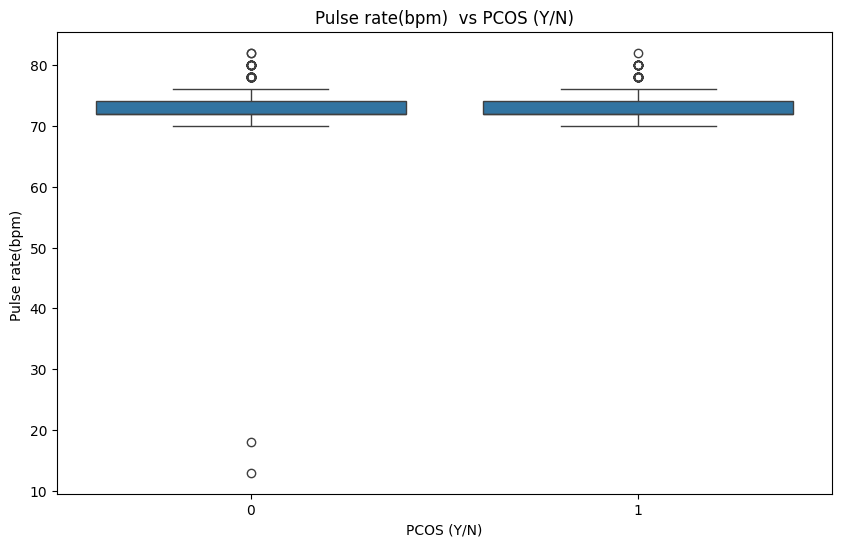

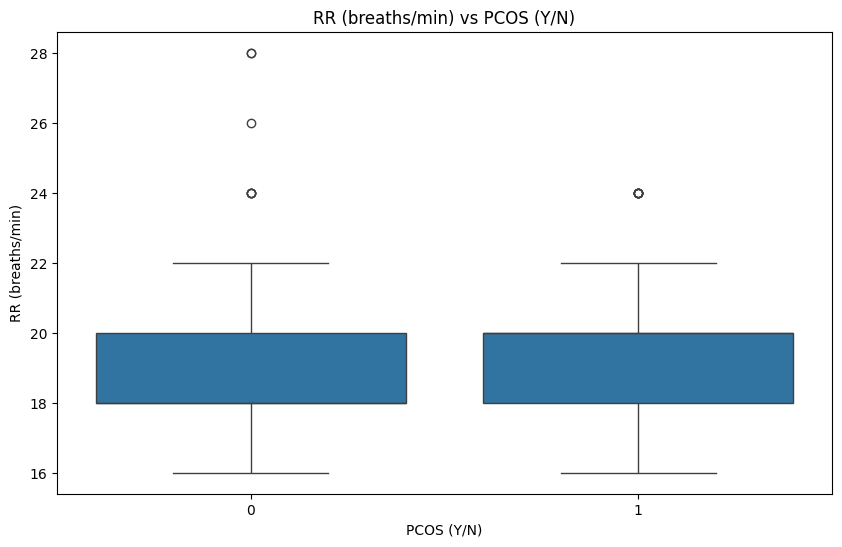

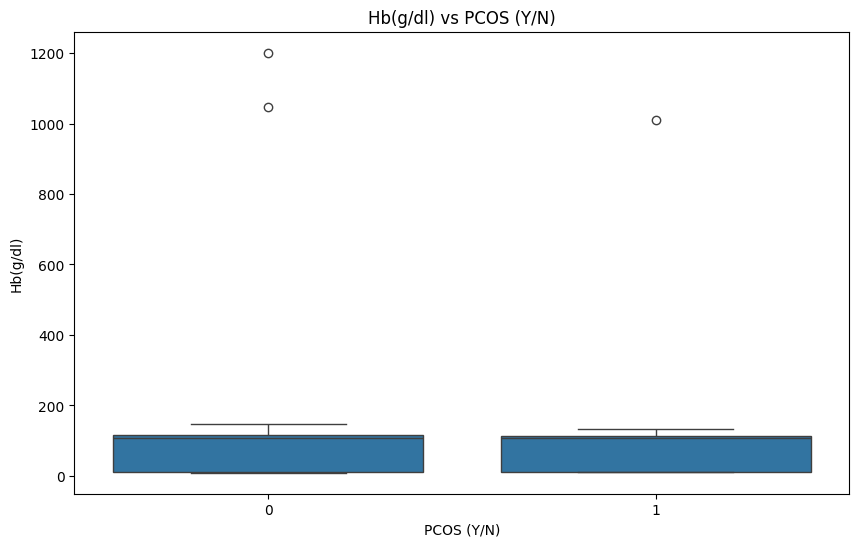

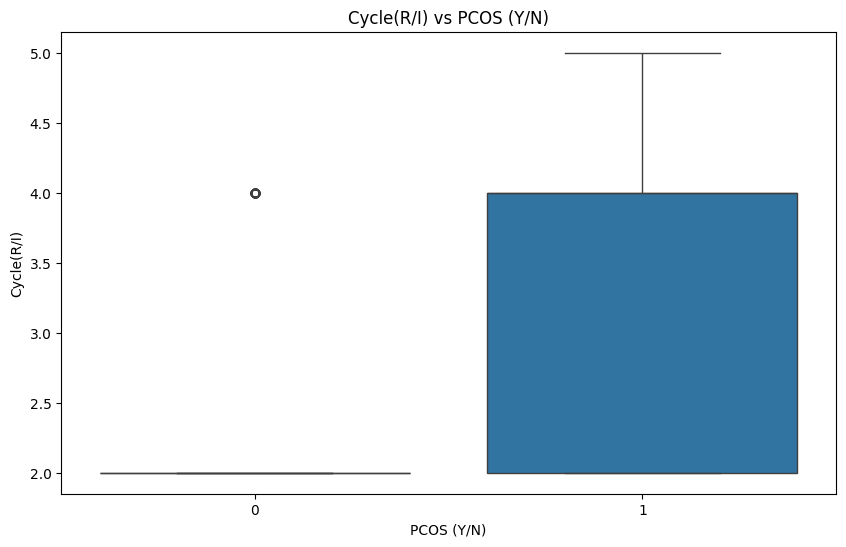

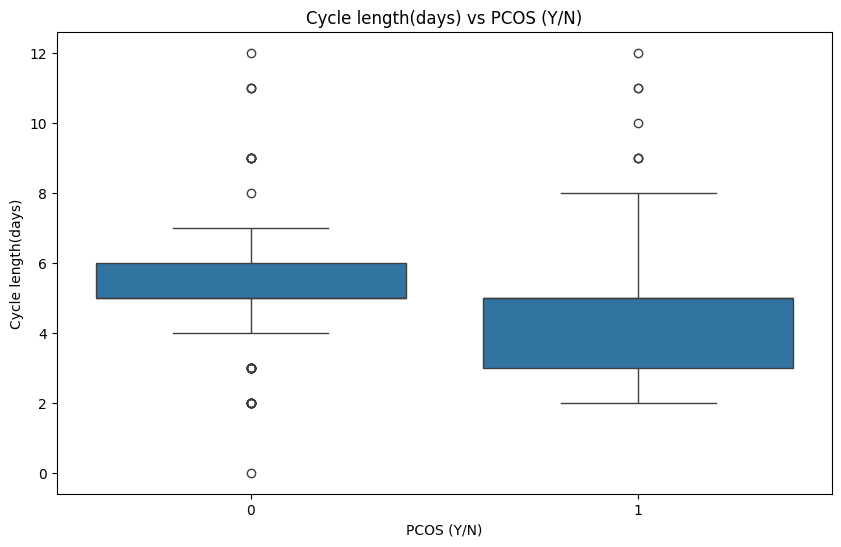

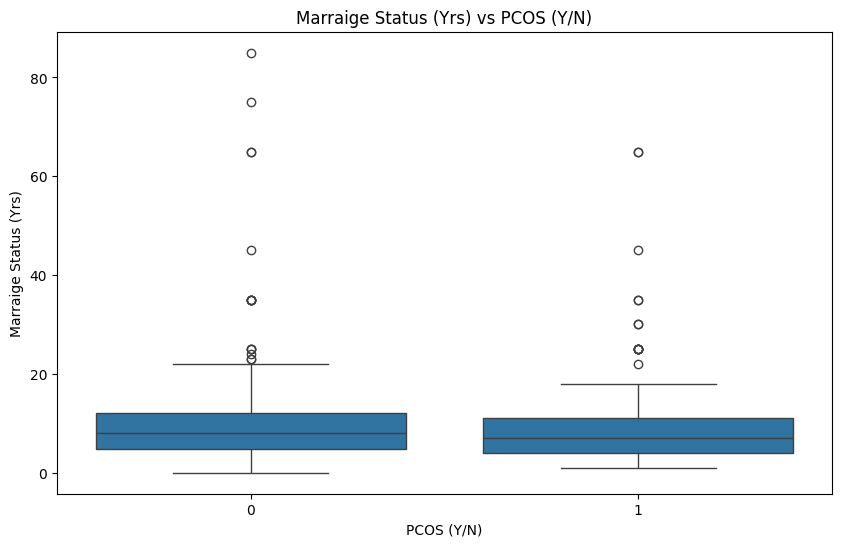

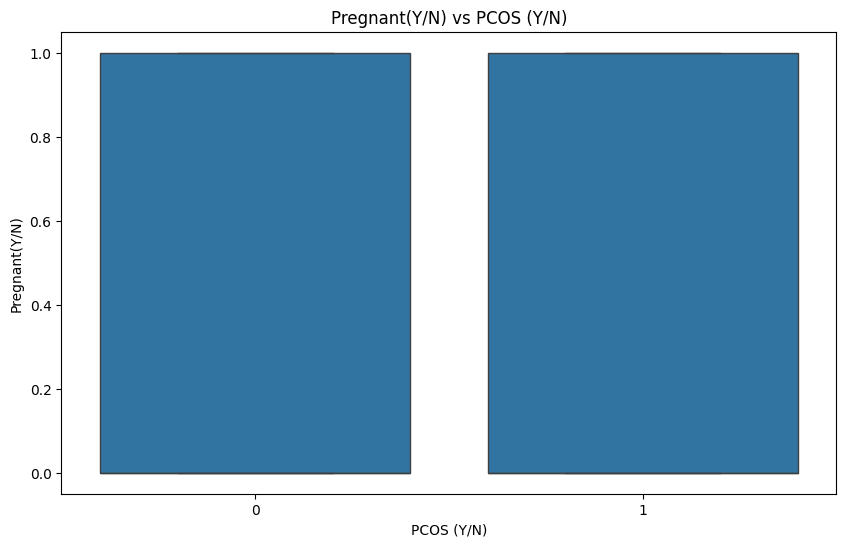

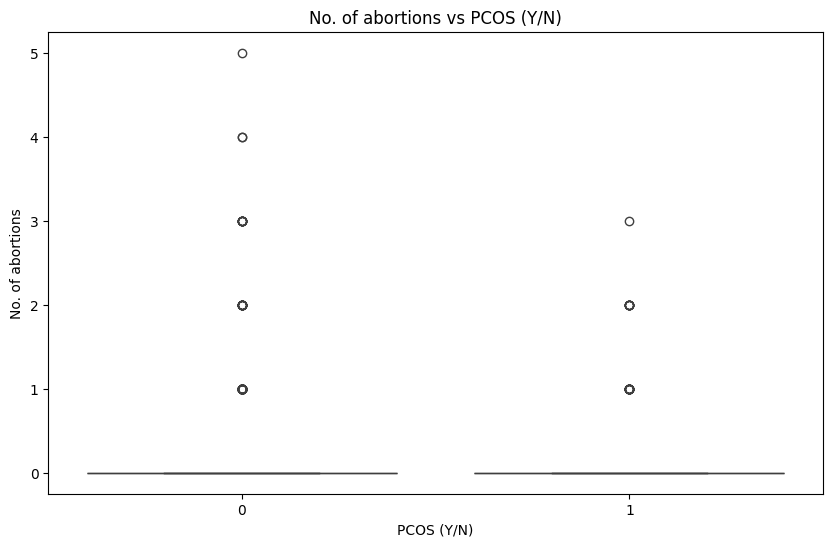

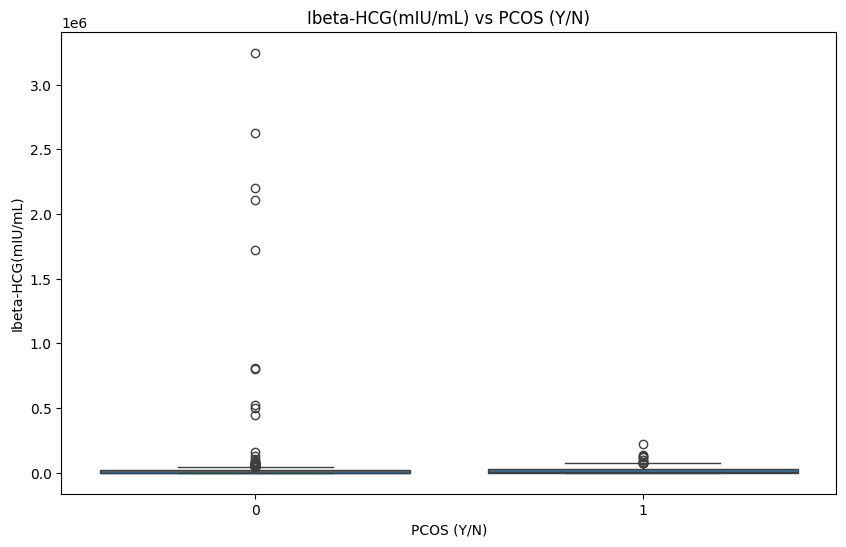

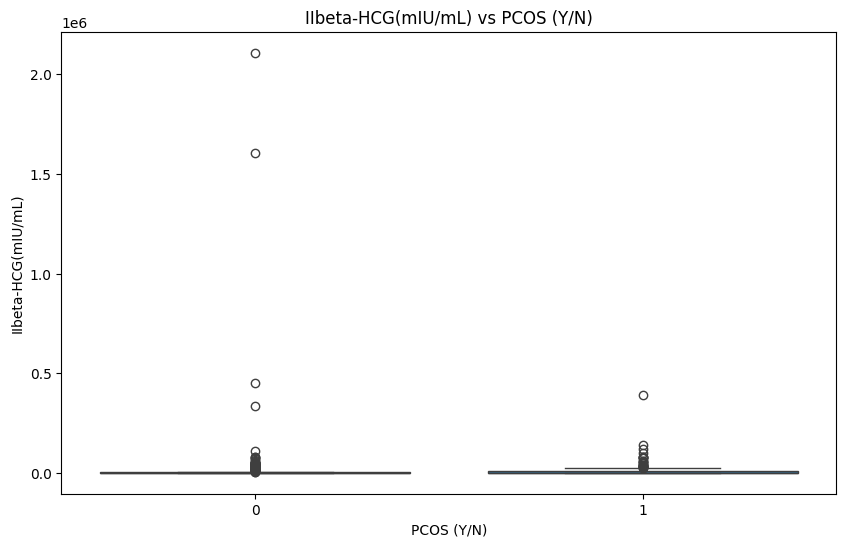

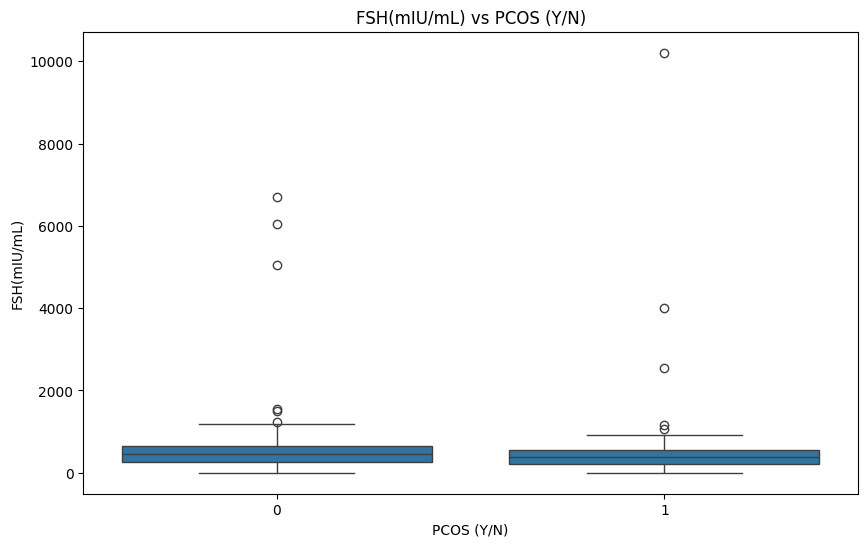

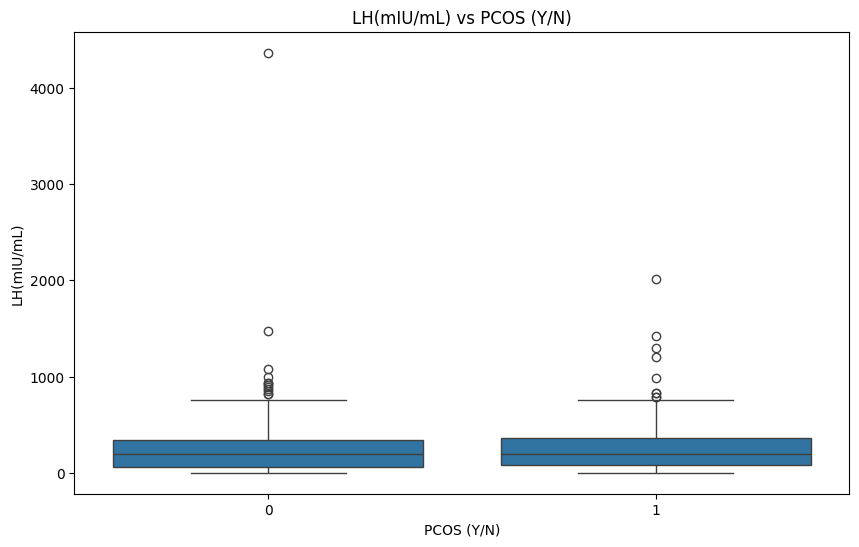

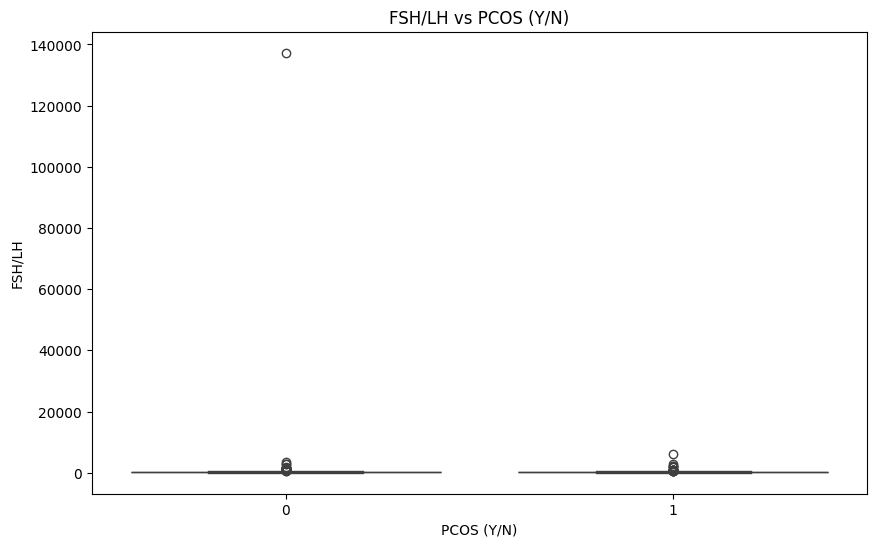

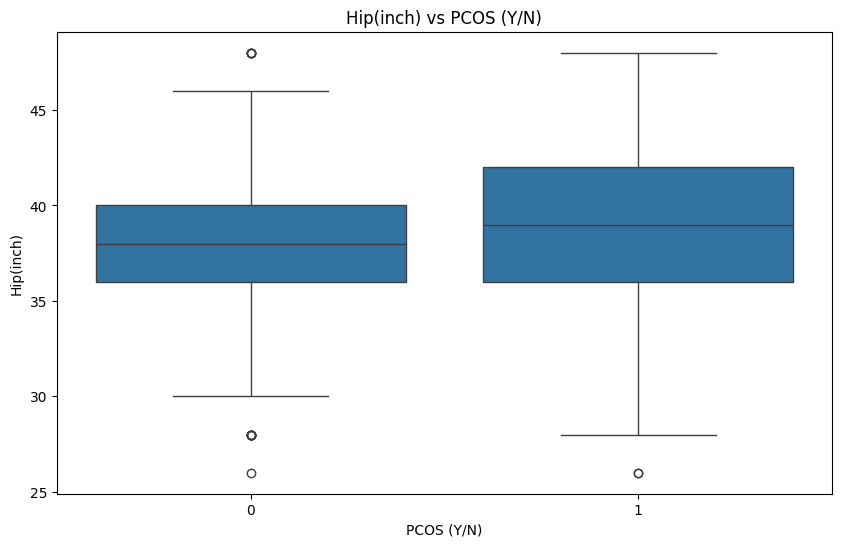

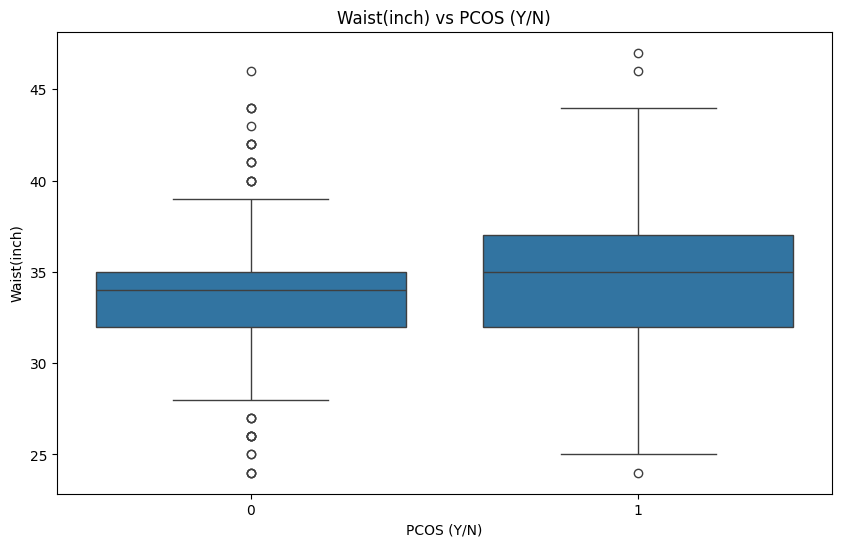

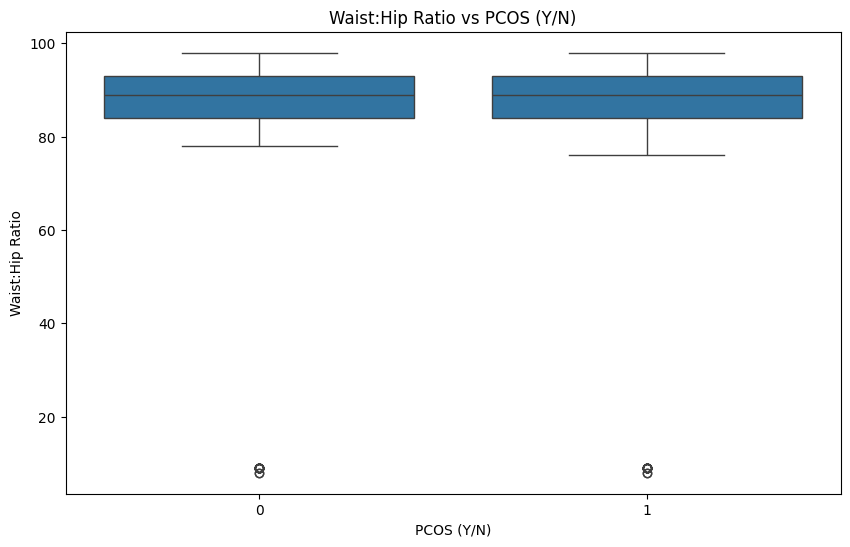

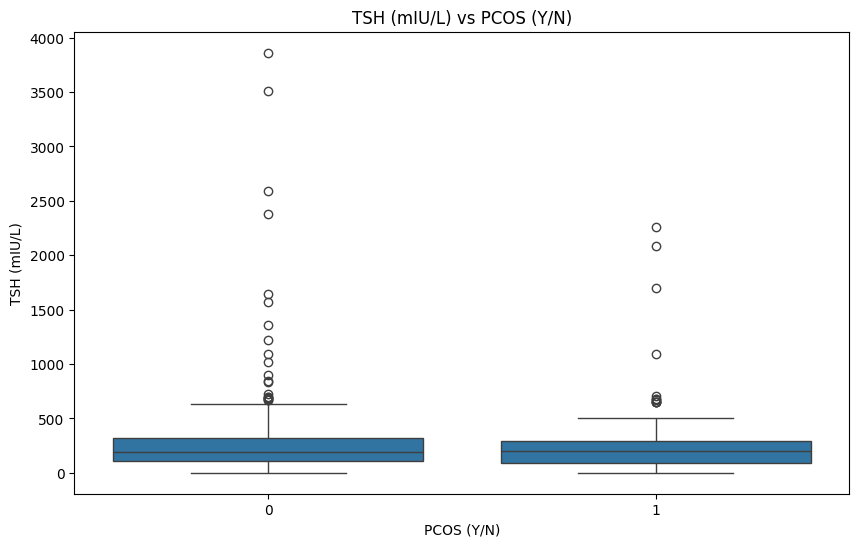

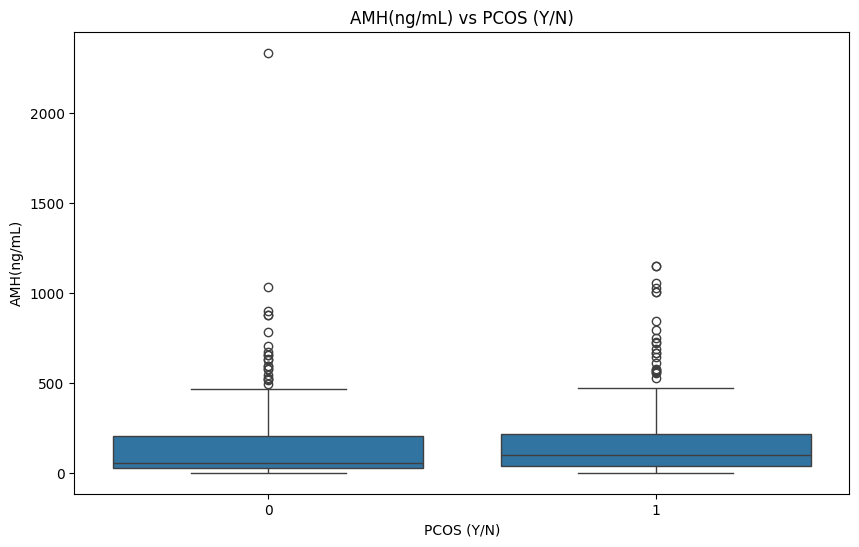

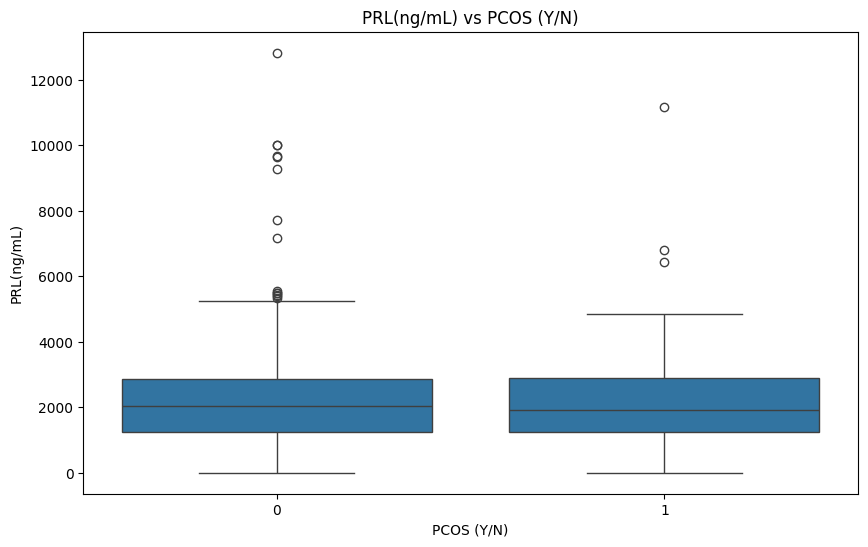

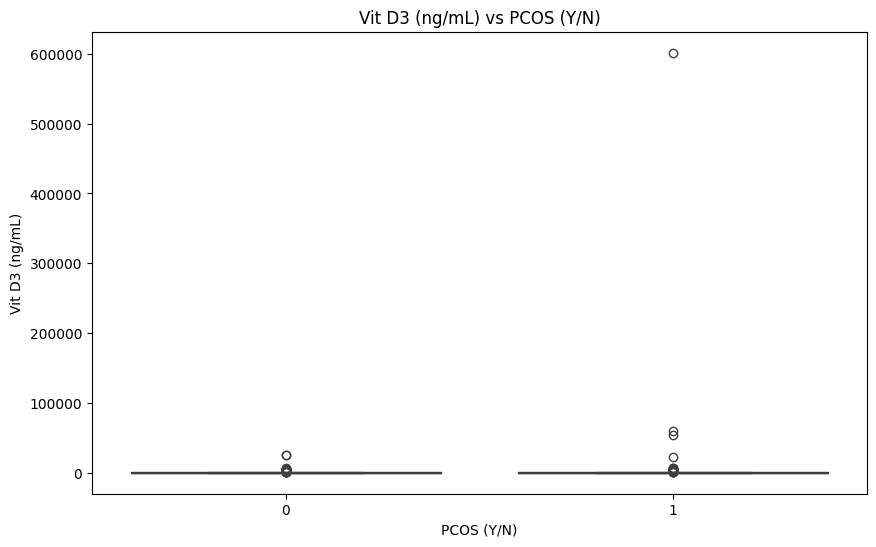

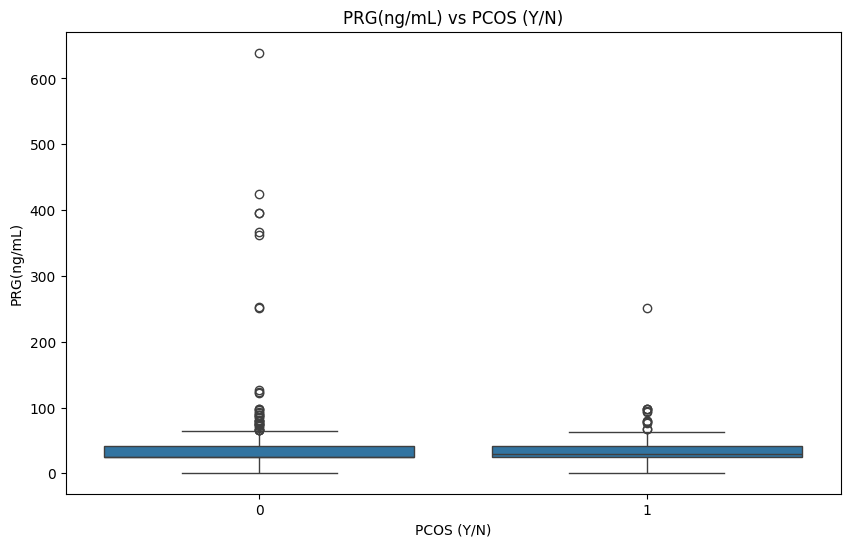

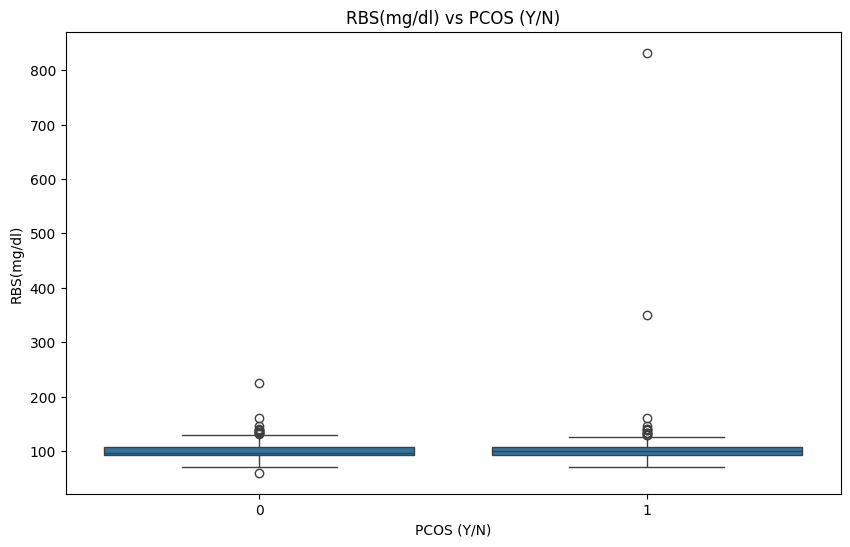

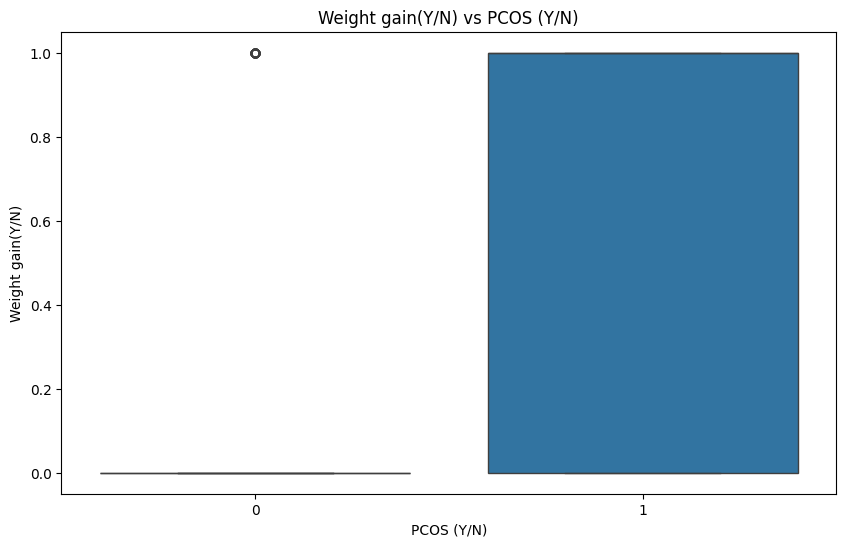

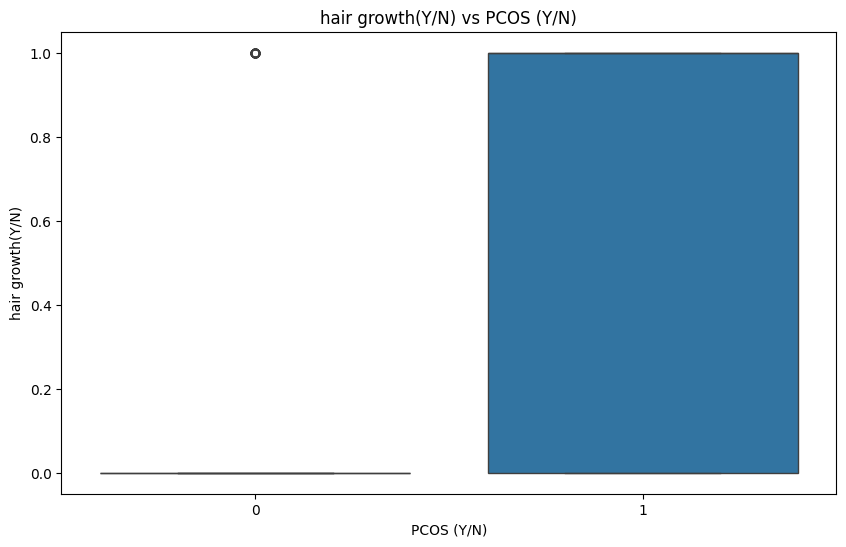

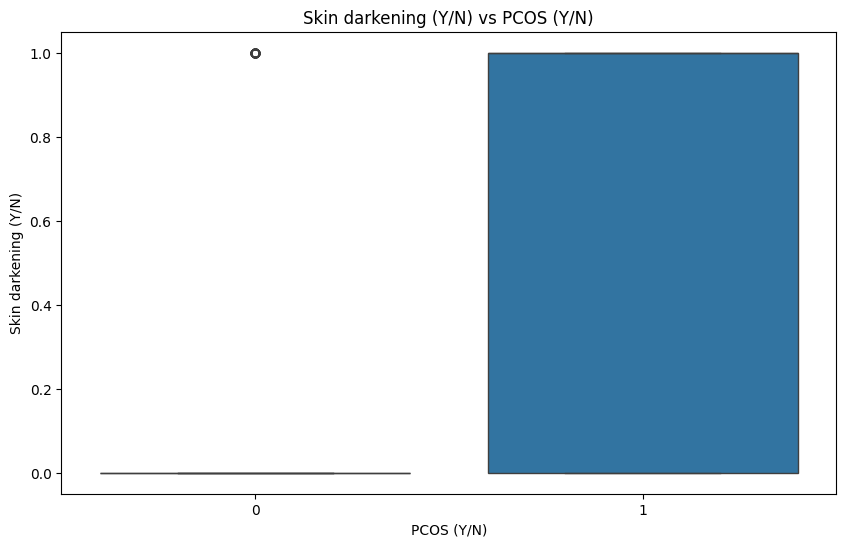

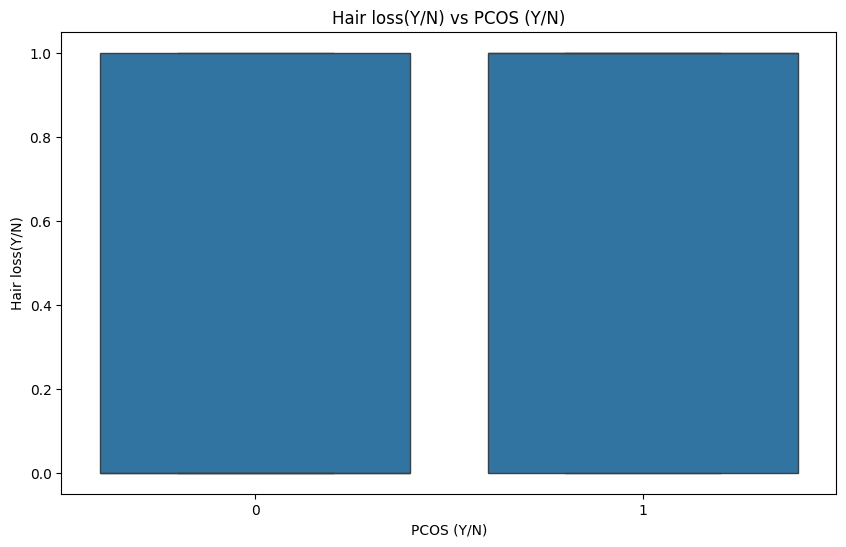

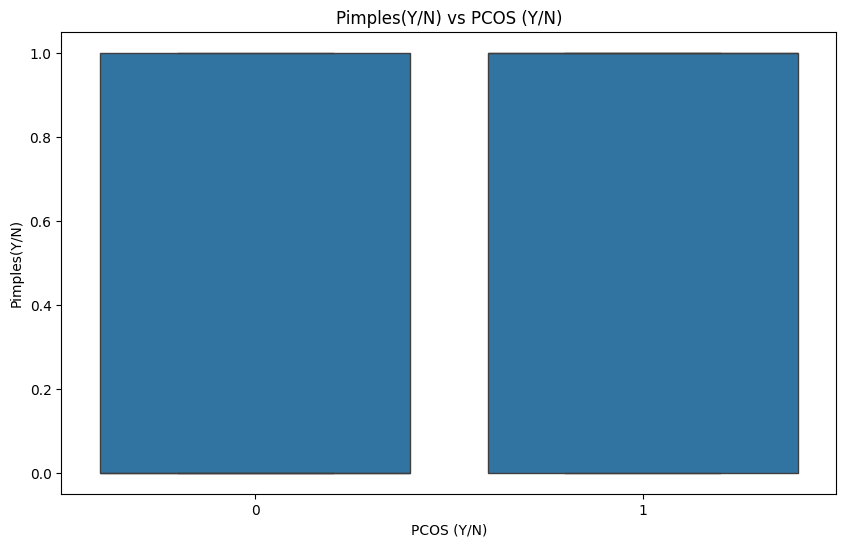

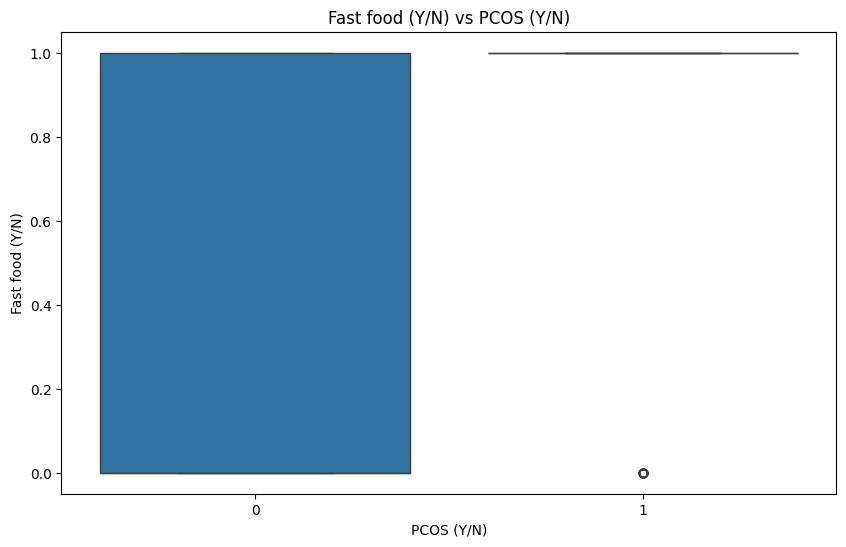

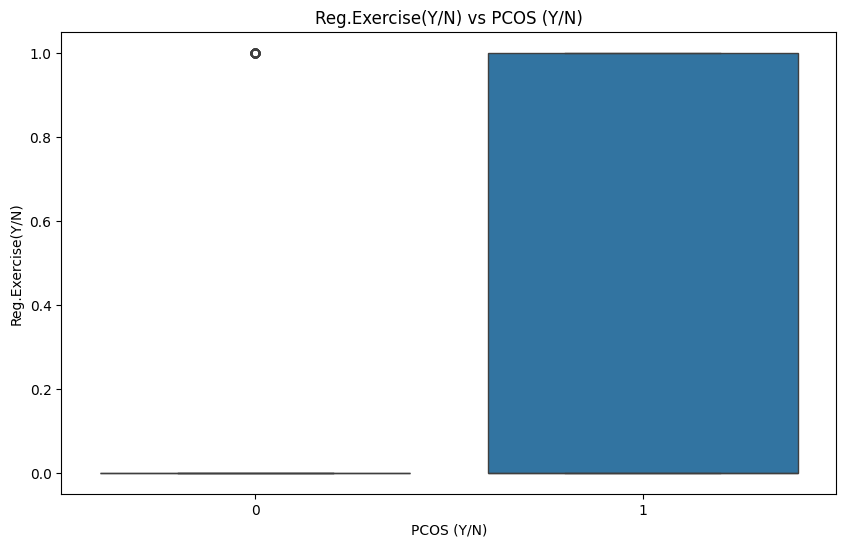

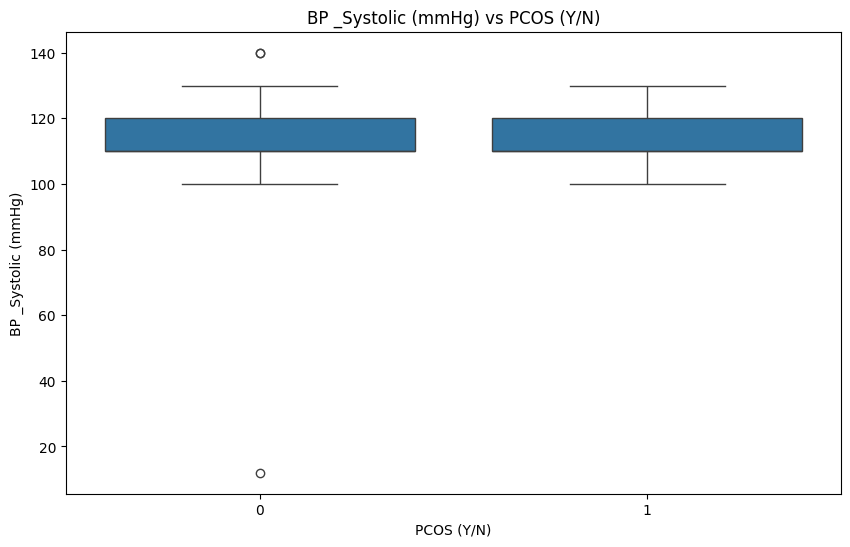

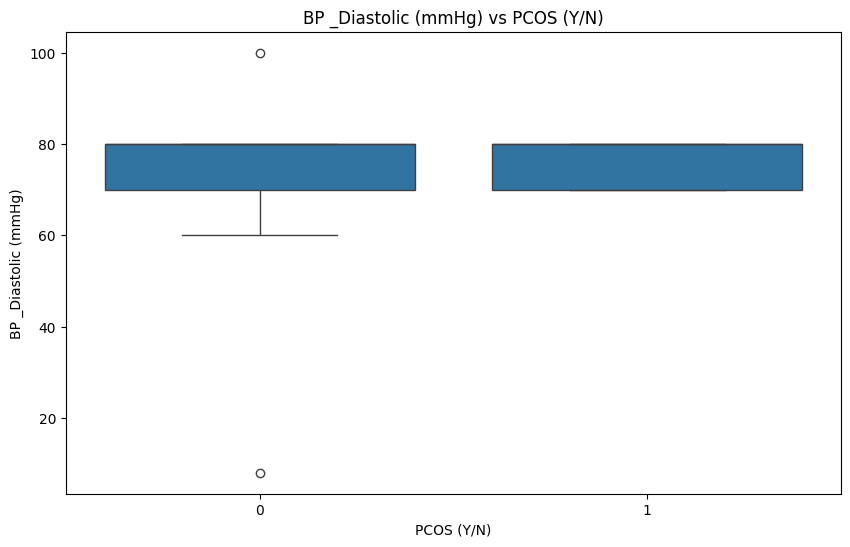

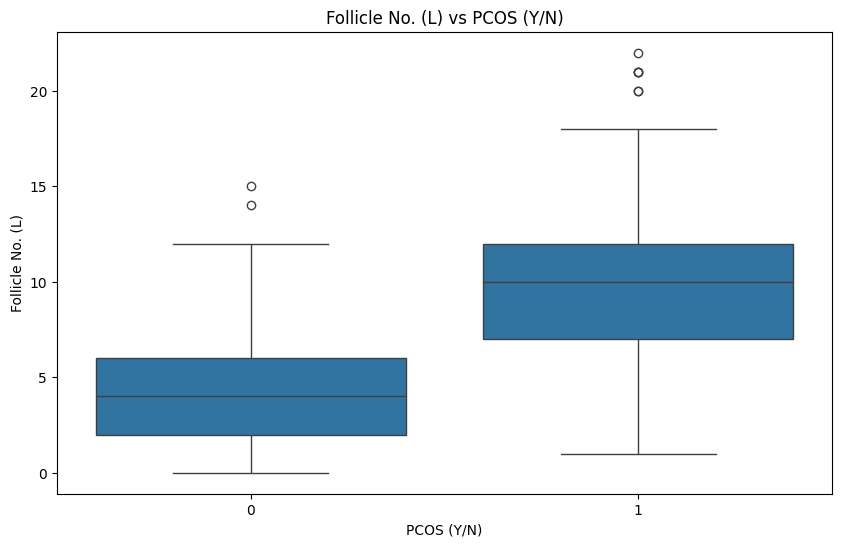

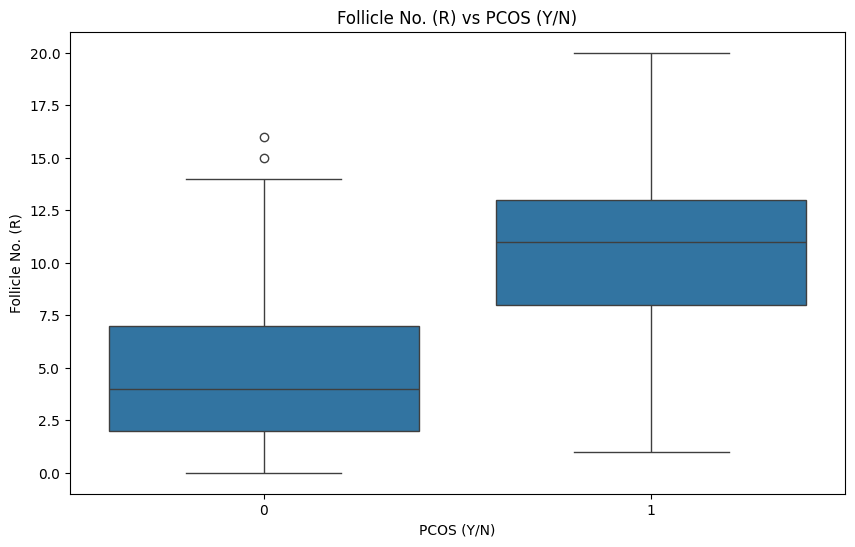

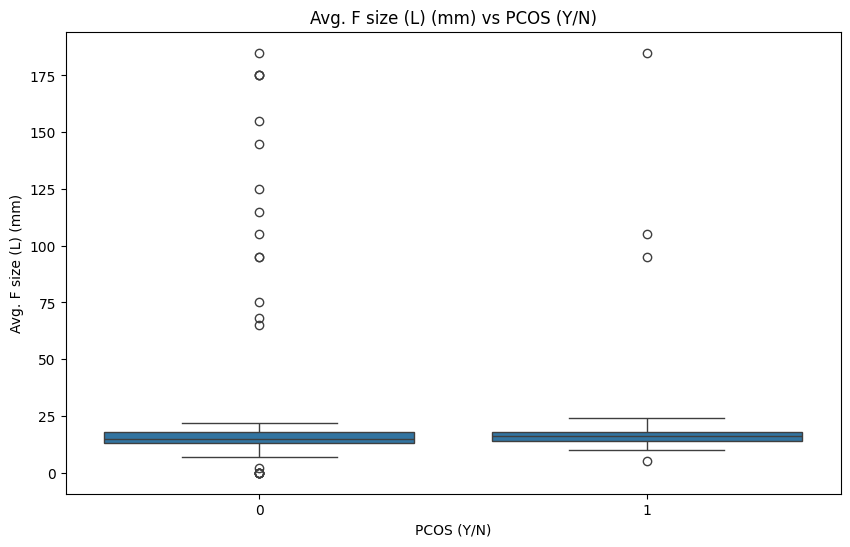

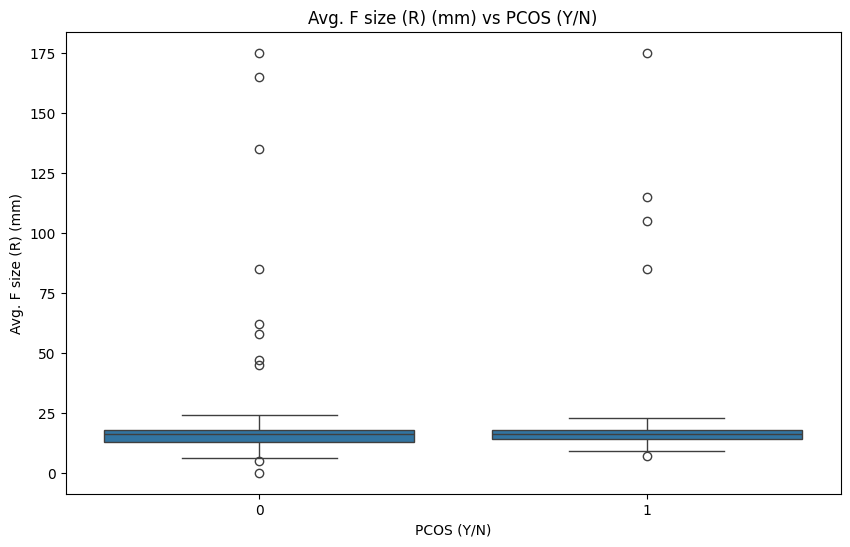

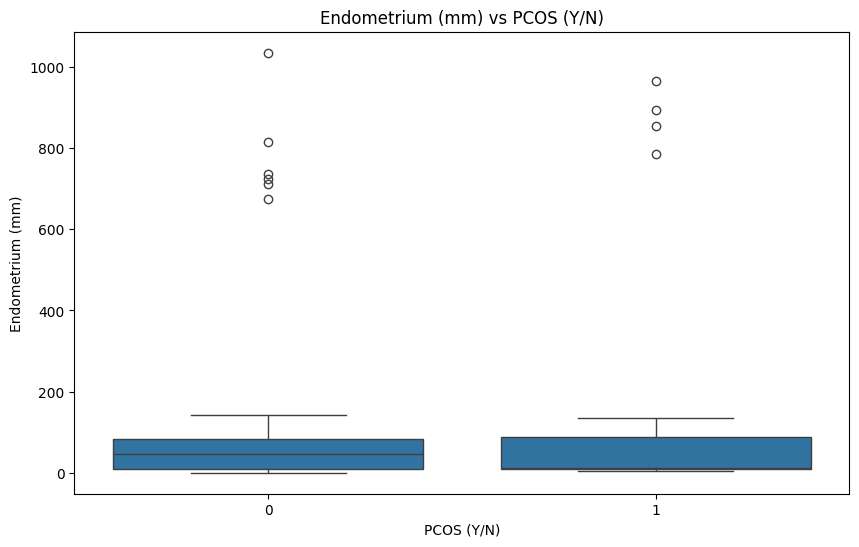

In [14]:
# Boxplot numerik vs target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='PCOS (Y/N)', y=feature, data=df)
    plt.title(f'{feature} vs PCOS (Y/N)')
    plt.show()

## Boxplot Outlier

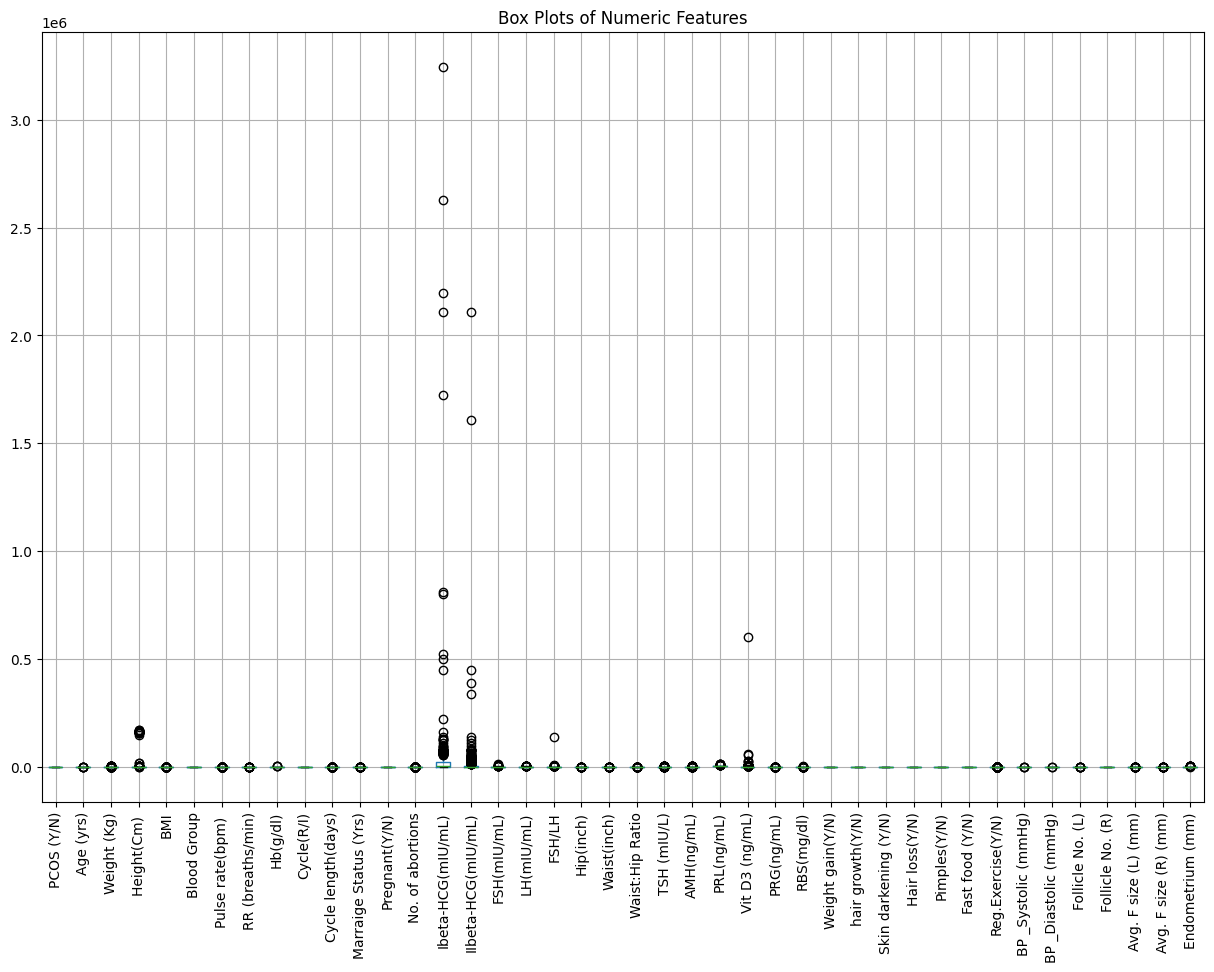

In [15]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

## Duplikat data

In [16]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


In [17]:
# # Cek duplikat
# duplicate_count = df.duplicated().sum()
# print(f"Jumlah baris duplikat: {duplicate_count}")

# # Hapus duplikat
# df.drop_duplicates(inplace=True)

# print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    int64  
 3   Height(Cm)             541 non-null    int64  
 4   BMI                    541 non-null    int64  
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    int64  
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  541 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14  Ibeta-HCG(mIU/mL)      541 non-null    int64  
 15  IIbeta-HCG(

In [19]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

menghapus kolom-kolom (features) pada dataframe df yang hanya memiliki satu nilai unik.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    int64  
 3   Height(Cm)             541 non-null    int64  
 4   BMI                    541 non-null    int64  
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    int64  
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  541 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14  Ibeta-HCG(mIU/mL)      541 non-null    int64  
 15  IIbeta-HCG(

# Modeling

In [21]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop(['PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

In [23]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [24]:
# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

In [25]:
# Evaluasi
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test,y_pred_rf, average='micro'))
print('Recall:', recall_score(y_test,y_pred_rf, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8727272727272727
Precision: 0.8727272727272727
Recall: 0.8727272727272727

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.92      0.67      0.77        18

    accuracy                           0.87        55
   macro avg       0.89      0.82      0.84        55
weighted avg       0.88      0.87      0.87        55



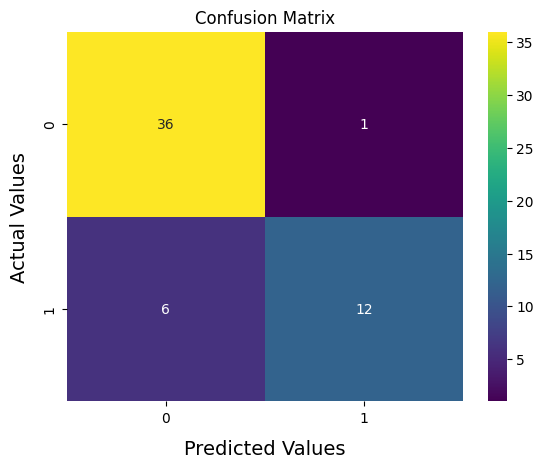

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix')
plt.show()

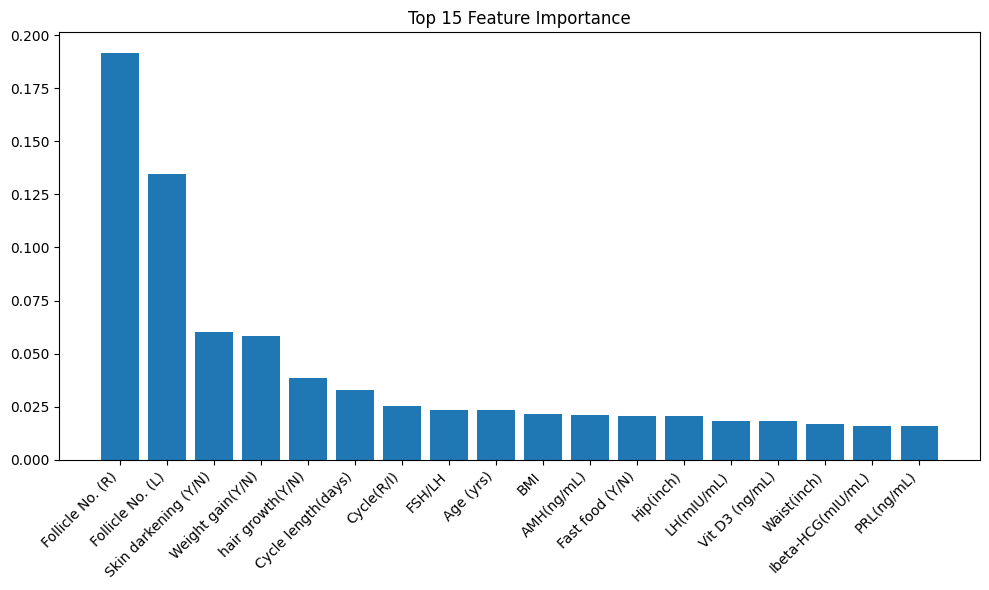

In [27]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 15 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()